In [1]:
!pip install matplotlib opencv-python json5

  Using cached json5-0.12.1-py3-none-any.whl.metadata (36 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached numpy-2.3.4-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pillow-12.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 10.0 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 10.9 MB/s  0:00:00 eta 0:00:01
Using cached json5-0.12.1-py3-none-any.whl (36 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.7 MB/s  0:00:00 eta 0:00:01
Using cached pillow-12.0.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [matplotlib]0 [matplotlib]on]


In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
#hi

filename = "0a0a0b1a-7c39d841"
# --- Load ---
with open(f"{filename}.json") as f:
    data = json.load(f)

frame = data["frames"][0]
objects = frame["objects"]

In [5]:
image_path = f"{filename}.jpg"  # adjust path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
for obj in objects:
    if "box2d" in obj:
        box = obj["box2d"]
        x1, y1, x2, y2 = int(box["x1"]), int(box["y1"]), int(box["x2"]), int(box["y2"])
        category = obj["category"]

        # draw rectangle
        color = (0, 255, 0) if category == "car" else (255, 165, 0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

        # label text
        cv2.putText(img, category, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

In [ ]:
for obj in objects:
    if "poly2d" in obj:
        pts = np.array([[p[0], p[1]] for p in obj["poly2d"]], np.int32)
        pts = pts.reshape((-1, 1, 2))
        
        category = obj["category"]

        if "area/drivable" in category:
            cv2.fillPoly(img, [pts], (0, 255, 0))  # green fill
        elif "area/alternative" in category:
            cv2.fillPoly(img, [pts], (255, 0, 0))  # red fill
        elif "lane" in category:
            cv2.polylines(img, [pts], False, (255, 255, 255), 2) 

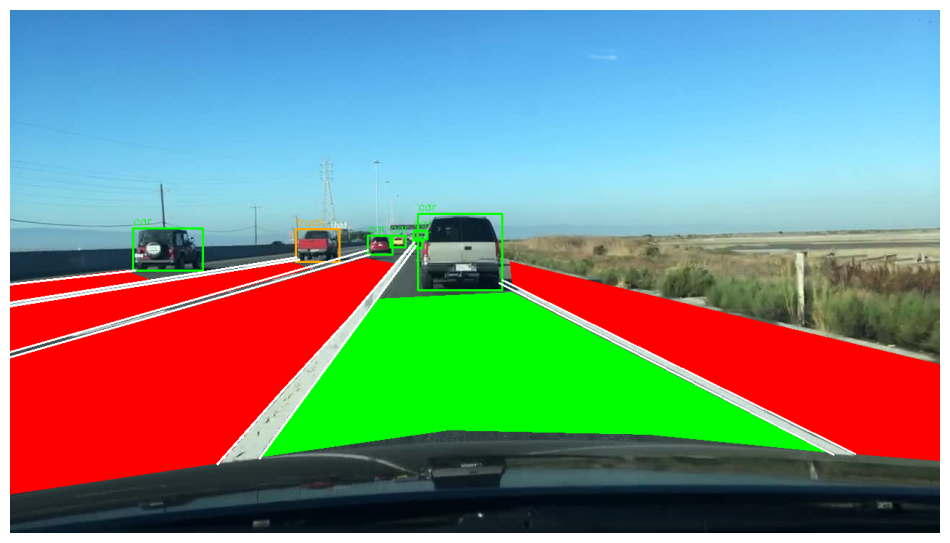

In [8]:
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()